In [158]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,OneHotEncoder
from sklearn.ensemble import IsolationForest
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor


from sklearn.metrics import mean_squared_error, r2_score



In [159]:
df=pd.read_csv('Life Expectancy Data.csv')

In [160]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]


In [161]:
train_set, test_set = shuffle_and_split_data(df, 0.2)
len(train_set)

2351

In [162]:
len(test_set)

587

In [163]:
train_set.drop(['Country','Year'],axis=1,inplace=True)
test_set.drop(['Country','Year'],axis=1,inplace=True)

/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_7276/4229173078.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_set.drop(['Country','Year'],axis=1,inplace=True)
/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_7276/4229173078.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_set.drop(['Country','Year'],axis=1,inplace=True)


In [164]:
df.shape

(2938, 22)

In [165]:
df.sample(20)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
58,Angola,2005,Developing,47.4,382.0,92,5.04,98.191451,NaN,258,...,39.0,4.10,38.0,2.6,1443.991929,19552542.0,1.0,9.9,0.426,6.8
734,Democratic Republic of the Congo,2002,Developing,52.1,341.0,229,1.85,0.000000,NaN,30466,...,4.0,2.59,38.0,2.4,NaN,NaN,12.1,11.9,NaN,NaN
1120,Guyana,2001,Developing,65.4,247.0,1,6.71,15.549787,85.0,0,...,9.0,5.82,85.0,1.7,925.582546,752263.0,5.9,5.7,0.606,10.9
299,Bhutan,2004,Developing,64.2,263.0,1,0.96,2.586698,89.0,3,...,9.0,4.41,89.0,0.3,197.457880,64282.0,18.0,18.8,0.000,8.8
683,Cyprus,2005,Developed,78.7,65.0,0,11.41,1562.520827,88.0,1,...,98.0,6.37,98.0,0.1,25324.486660,127658.0,0.9,1.0,0.826,13.5
2430,Spain,2010,Developed,81.9,64.0,1,9.78,578.741717,97.0,302,...,97.0,9.56,97.0,0.1,3736.228000,46576897.0,0.6,0.5,0.860,16.4
1745,Montenegro,2002,Developing,73.4,136.0,0,0.01,36.480240,NaN,0,...,NaN,8.33,NaN,0.1,216.243274,69828.0,2.5,2.5,0.000,0.0
1816,Nepal,2012,Developing,68.9,167.0,20,0.26,80.587884,9.0,3362,...,9.0,5.89,9.0,0.2,681.792587,27649925.0,16.3,16.7,0.538,12.3
832,El Salvador,2001,Developing,68.9,219.0,4,2.88,332.105659,75.0,2,...,94.0,8.20,92.0,0.4,2338.772244,595962.0,2.1,2.0,0.615,11.6
1122,Haiti,2015,Developing,63.5,24.0,14,NaN,0.000000,6.0,0,...,56.0,NaN,6.0,0.5,814.546395,171161.0,3.9,3.9,0.490,9.1


In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [167]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
Life expectancy,2928.0,6.922493e+01,9.523867e+00,36.30000,63.100000,7.210000e+01,7.570000e+01,8.900000e+01
Adult Mortality,2928.0,1.647964e+02,1.242921e+02,1.00000,74.000000,1.440000e+02,2.280000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
Alcohol,2744.0,4.602861e+00,4.052413e+00,0.01000,0.877500,3.755000e+00,7.702500e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
Hepatitis B,2385.0,8.094046e+01,2.507002e+01,1.00000,77.000000,9.200000e+01,9.700000e+01,9.900000e+01
Measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
BMI,2904.0,3.832125e+01,2.004403e+01,1.00000,19.300000,4.350000e+01,5.620000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


In [168]:
df.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [169]:
df[df['Hepatitis B'].isna()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
44,Algeria,2003,Developing,71.7,146.0,20,0.34,25.018523,NaN,15374,...,87.0,3.60,87.0,0.1,294.335560,3243514.0,6.3,6.1,0.663,11.5
45,Algeria,2002,Developing,71.6,145.0,20,0.36,148.511984,NaN,5862,...,86.0,3.73,86.0,0.1,1774.336730,3199546.0,6.3,6.2,0.653,11.1
46,Algeria,2001,Developing,71.4,145.0,20,0.23,147.986071,NaN,2686,...,89.0,3.84,89.0,0.1,1732.857979,31592153.0,6.4,6.3,0.644,10.9
47,Algeria,2000,Developing,71.3,145.0,21,0.25,154.455944,NaN,0,...,86.0,3.49,86.0,0.1,1757.177970,3118366.0,6.5,6.4,0.636,10.7
57,Angola,2006,Developing,47.7,381.0,90,5.84,25.086888,NaN,765,...,36.0,4.54,34.0,2.5,262.415149,2262399.0,9.8,9.7,0.439,7.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2917,Zambia,2004,Developing,47.9,578.0,36,2.46,8.369852,NaN,35,...,84.0,7.33,83.0,17.6,53.277222,11731746.0,7.2,7.1,0.456,10.5
2918,Zambia,2003,Developing,46.4,64.0,39,2.33,65.789974,NaN,881,...,85.0,8.18,83.0,18.2,429.158343,11421984.0,7.3,7.2,0.443,10.2
2919,Zambia,2002,Developing,45.5,69.0,41,2.44,54.043480,NaN,25036,...,85.0,6.93,84.0,18.4,377.135244,111249.0,7.4,7.3,0.433,10.0
2920,Zambia,2001,Developing,44.6,611.0,43,2.61,46.830275,NaN,16997,...,86.0,6.56,85.0,18.6,378.273624,1824125.0,7.4,7.4,0.424,9.8


In [170]:
df[df['Population'].isna()]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
64,Antigua and Barbuda,2015,Developing,76.4,13.0,0,NaN,0.000000,99.0,0,...,86.0,NaN,99.0,0.2,13566.95410,NaN,3.3,3.3,0.784,13.9
65,Antigua and Barbuda,2014,Developing,76.2,131.0,0,8.56,2422.999774,99.0,0,...,96.0,5.54,99.0,0.2,12888.29667,NaN,3.3,3.3,0.782,13.9
66,Antigua and Barbuda,2013,Developing,76.1,133.0,0,8.58,1991.430372,99.0,0,...,98.0,5.33,99.0,0.2,12224.86416,NaN,3.3,3.3,0.781,13.9
67,Antigua and Barbuda,2012,Developing,75.9,134.0,0,8.18,2156.229842,98.0,0,...,97.0,5.39,98.0,0.2,12565.44197,NaN,3.3,3.3,0.778,13.8
68,Antigua and Barbuda,2011,Developing,75.7,136.0,0,7.84,1810.875316,99.0,0,...,99.0,5.65,99.0,0.1,11929.34991,NaN,3.3,3.3,0.782,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2901,Yemen,2004,Developing,62.2,247.0,42,0.06,0.000000,43.0,12708,...,72.0,4.90,72.0,0.1,NaN,NaN,13.9,13.9,0.464,8.4
2902,Yemen,2003,Developing,61.9,249.0,43,0.04,0.000000,38.0,8536,...,61.0,5.00,61.0,0.1,NaN,NaN,14.0,13.9,0.457,8.2
2903,Yemen,2002,Developing,61.5,25.0,45,0.07,0.000000,31.0,890,...,64.0,4.22,65.0,0.1,NaN,NaN,14.0,14.0,0.450,8.0
2904,Yemen,2001,Developing,61.1,251.0,46,0.08,0.000000,19.0,485,...,73.0,4.34,73.0,0.1,NaN,NaN,14.0,14.0,0.444,7.9


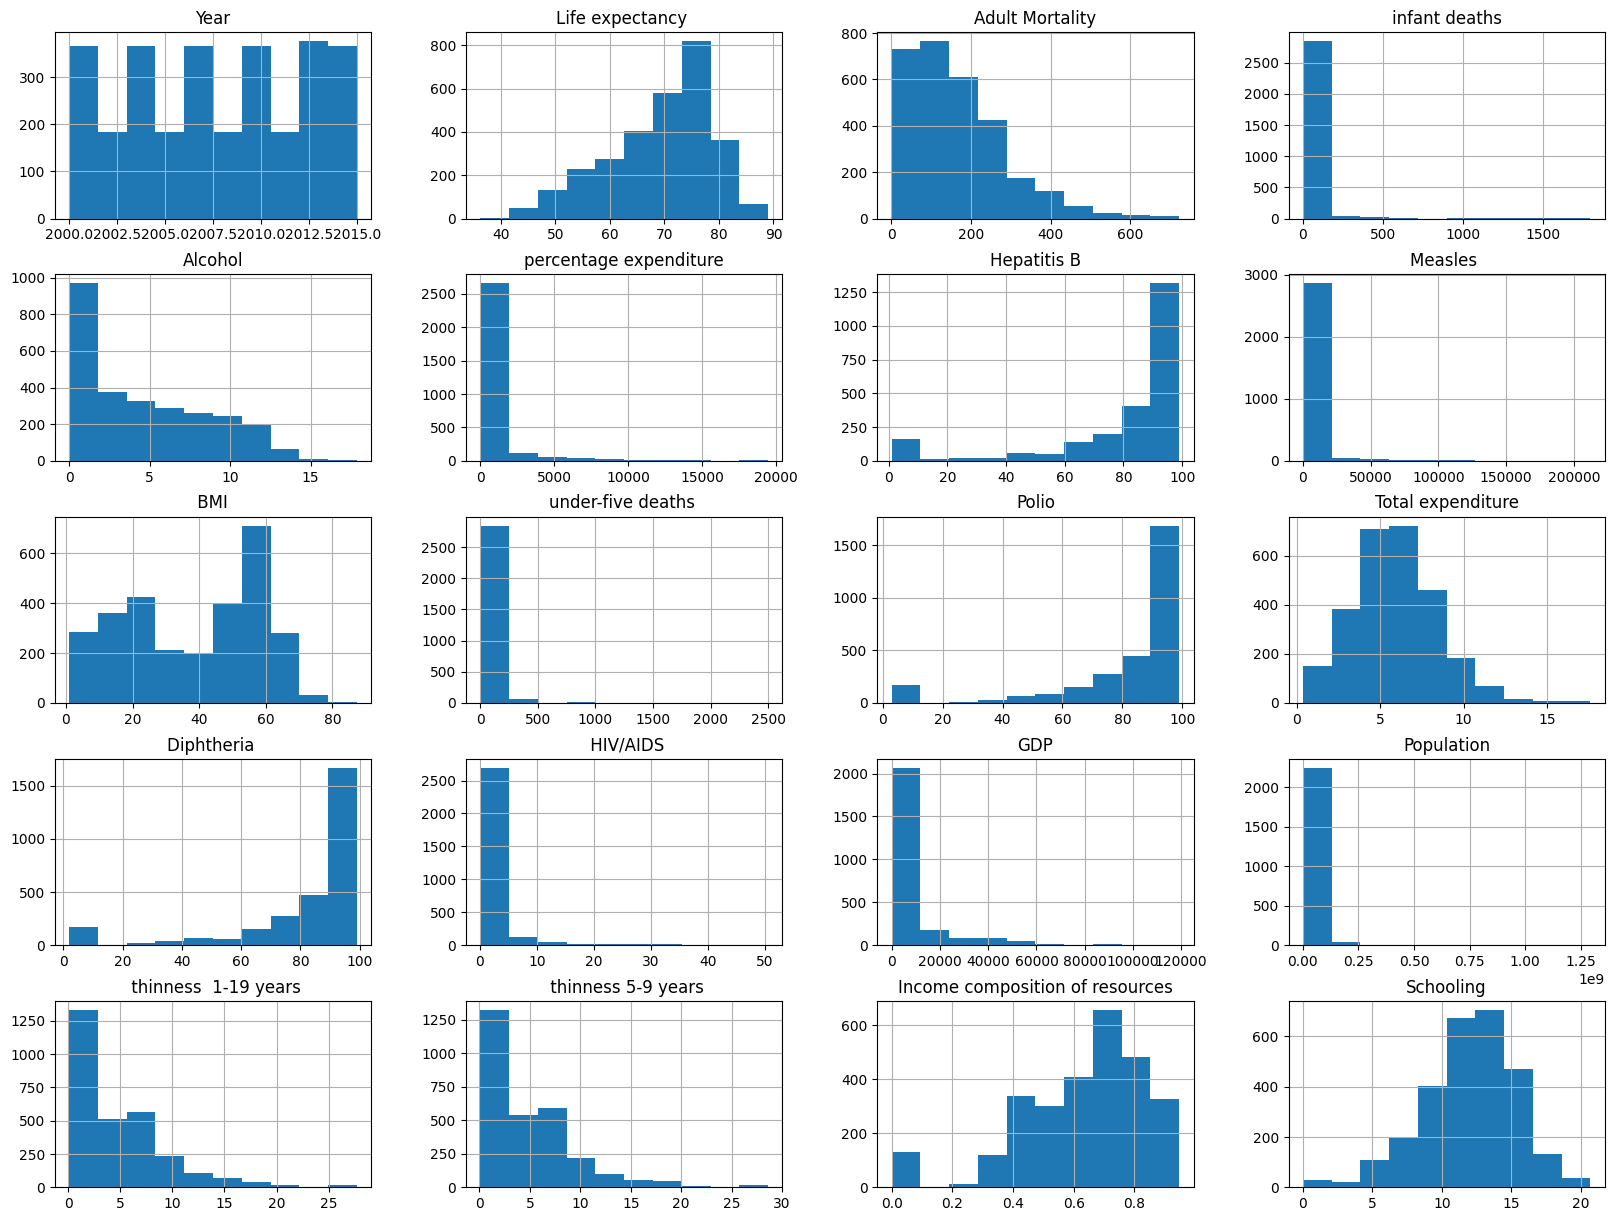

In [171]:
df.hist(figsize=(20,15));

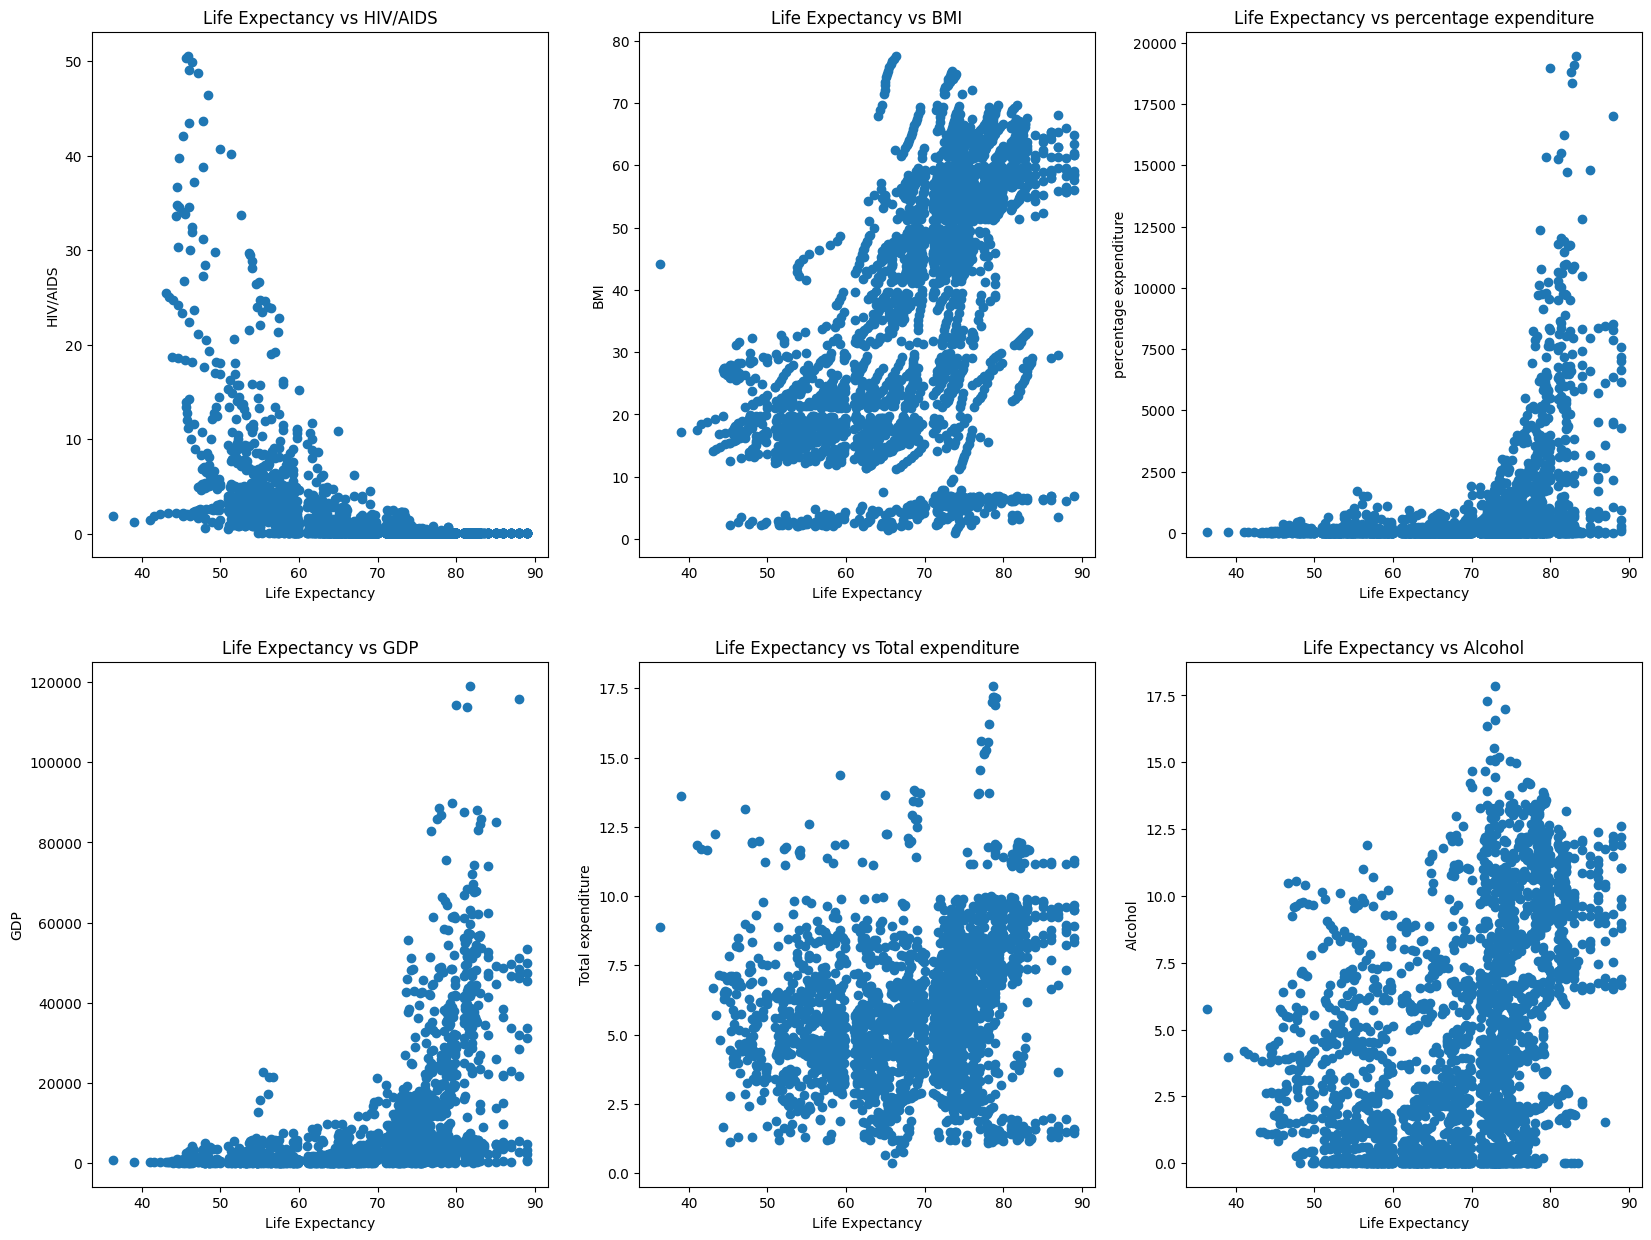

In [172]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
plt.scatter(df['Life expectancy '],df[' HIV/AIDS'])
plt.xlabel('Life Expectancy')
plt.ylabel('HIV/AIDS')
plt.title('Life Expectancy vs HIV/AIDS');

plt.subplot(2,3,2)
plt.scatter(df['Life expectancy '],df[' BMI '])
plt.xlabel('Life Expectancy')
plt.ylabel('BMI')
plt.title('Life Expectancy vs BMI');

plt.subplot(2,3,3)
plt.scatter(df['Life expectancy '],df['percentage expenditure'])
plt.xlabel('Life Expectancy')
plt.ylabel('percentage expenditure')
plt.title('Life Expectancy vs percentage expenditure');

plt.subplot(2,3,4)
plt.scatter(df['Life expectancy '],df['GDP'])
plt.xlabel('Life Expectancy')
plt.ylabel('GDP')
plt.title('Life Expectancy vs GDP');

plt.subplot(2,3,5)
plt.scatter(df['Life expectancy '],df['Total expenditure'])
plt.xlabel('Life Expectancy')
plt.ylabel('Total expenditure')
plt.title('Life Expectancy vs Total expenditure');

plt.subplot(2,3,6)
plt.scatter(df['Life expectancy '],df['Alcohol'])
plt.xlabel('Life Expectancy')
plt.ylabel('Alcohol')
plt.title('Life Expectancy vs Alcohol');


In [173]:
mean_life_expectancy = df.groupby('Status')['Life expectancy '].mean()
mean_life_expectancy


Status
Developed     79.197852
Developing    67.111465
Name: Life expectancy , dtype: float64

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

Text(0, 0.5, 'Life Expectancy')

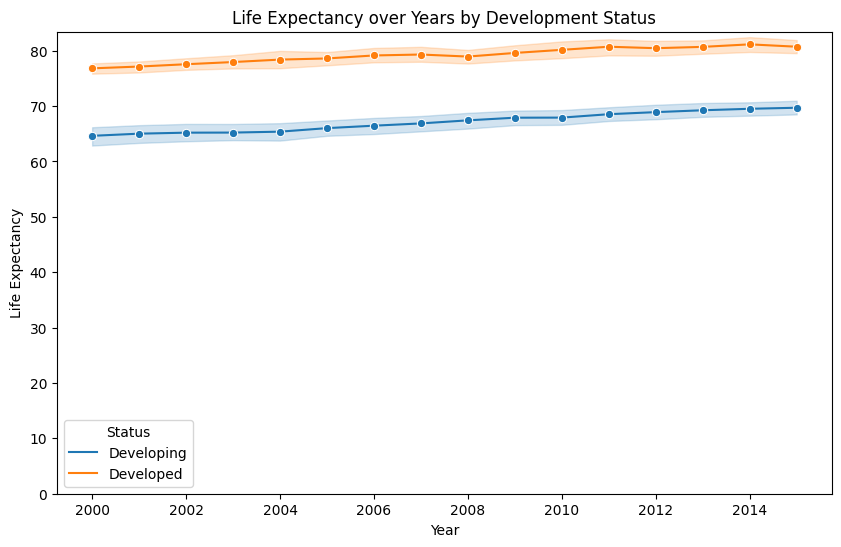

In [174]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Life expectancy ', hue='Status', marker='o').set_ylim(bottom=0)

plt.title('Life Expectancy over Years by Development Status')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')



In [175]:
df.select_dtypes(exclude='object').corr()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
Year,1.000000,0.170033,-0.079052,-0.037415,-0.052990,0.031400,0.104333,-0.082493,0.108974,-0.042937,0.094158,0.090740,0.134337,-0.139741,0.101620,0.016969,-0.047876,-0.050929,0.243468,0.209400
Life expectancy,0.170033,1.000000,-0.696359,-0.196557,0.404877,0.381864,0.256762,-0.157586,0.567694,-0.222529,0.465556,0.218086,0.479495,-0.556556,0.461455,-0.021538,-0.477183,-0.471584,0.724776,0.751975
Adult Mortality,-0.079052,-0.696359,1.000000,0.078756,-0.195848,-0.242860,-0.162476,0.031176,-0.387017,0.094146,-0.274823,-0.115281,-0.275131,0.523821,-0.296049,-0.013647,0.302904,0.308457,-0.457626,-0.454612
infant deaths,-0.037415,-0.196557,0.078756,1.000000,-0.115638,-0.085612,-0.223566,0.501128,-0.227279,0.996629,-0.170689,-0.128616,-0.175171,0.025231,-0.108427,0.556801,0.465711,0.471350,-0.145139,-0.193720
Alcohol,-0.052990,0.404877,-0.195848,-0.115638,1.000000,0.341285,0.087549,-0.051827,0.330408,-0.112370,0.221734,0.296942,0.222020,-0.048845,0.354712,-0.035252,-0.428795,-0.417414,0.450040,0.547378
percentage expenditure,0.031400,0.381864,-0.242860,-0.085612,0.341285,1.000000,0.016274,-0.056596,0.228700,-0.087852,0.147259,0.174420,0.143624,-0.097857,0.899373,-0.025662,-0.251369,-0.252905,0.381952,0.389687
Hepatitis B,0.104333,0.256762,-0.162476,-0.223566,0.087549,0.016274,1.000000,-0.120529,0.150380,-0.233126,0.486171,0.058280,0.611495,-0.112675,0.083903,-0.123321,-0.120429,-0.124960,0.199549,0.231117
Measles,-0.082493,-0.157586,0.031176,0.501128,-0.051827,-0.056596,-0.120529,1.000000,-0.175977,0.507809,-0.136166,-0.106241,-0.141882,0.030899,-0.076466,0.265966,0.224808,0.221072,-0.129568,-0.137225
BMI,0.108974,0.567694,-0.387017,-0.227279,0.330408,0.228700,0.150380,-0.175977,1.000000,-0.237669,0.284569,0.242503,0.283147,-0.243717,0.301557,-0.072301,-0.532025,-0.538911,0.508774,0.546961
under-five deaths,-0.042937,-0.222529,0.094146,0.996629,-0.112370,-0.087852,-0.233126,0.507809,-0.237669,1.000000,-0.188720,-0.130148,-0.195668,0.038062,-0.112081,0.544423,0.467789,0.472263,-0.163305,-0.209373


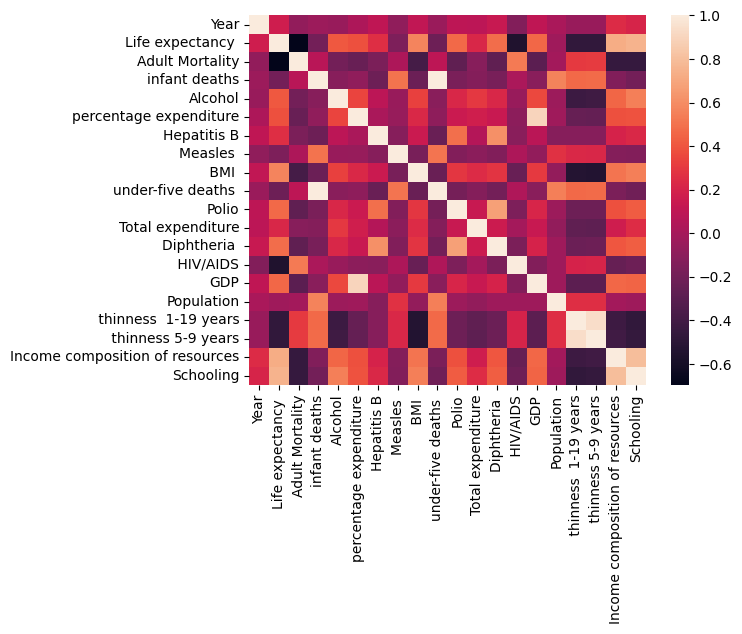

In [176]:
sns.heatmap(df.select_dtypes(exclude=['object']).corr());


In [177]:
cols_to_dummy=train_set.select_dtypes(include='object').columns
train_set=pd.get_dummies(train_set,columns=cols_to_dummy,drop_first=True,dtype='int')
train_set.shape

(2351, 20)

In [178]:
imputer = KNNImputer(n_neighbors=15, metric='nan_euclidean')


In [179]:
imputed_data = imputer.fit_transform(train_set.select_dtypes(exclude='object'))
imputed_data=pd.DataFrame(imputed_data,columns=train_set.columns)
imputed_data.isna().sum()

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Status_Developing                  0
dtype: int64

In [180]:
#cols_to_drop = [col for col in imputed_data.columns if col.startswith('Country')]

#imputed_data.drop('Year', axis=1, inplace=True)

imputed_data.shape

(2351, 20)

In [181]:
imputed_data.columns

Index(['Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol',
       'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ',
       'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ',
       ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years',
       ' thinness 5-9 years', 'Income composition of resources', 'Schooling',
       'Status_Developing'],
      dtype='object')

In [182]:
imputed_data.isna().sum()

Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
Status_Developing                  0
dtype: int64

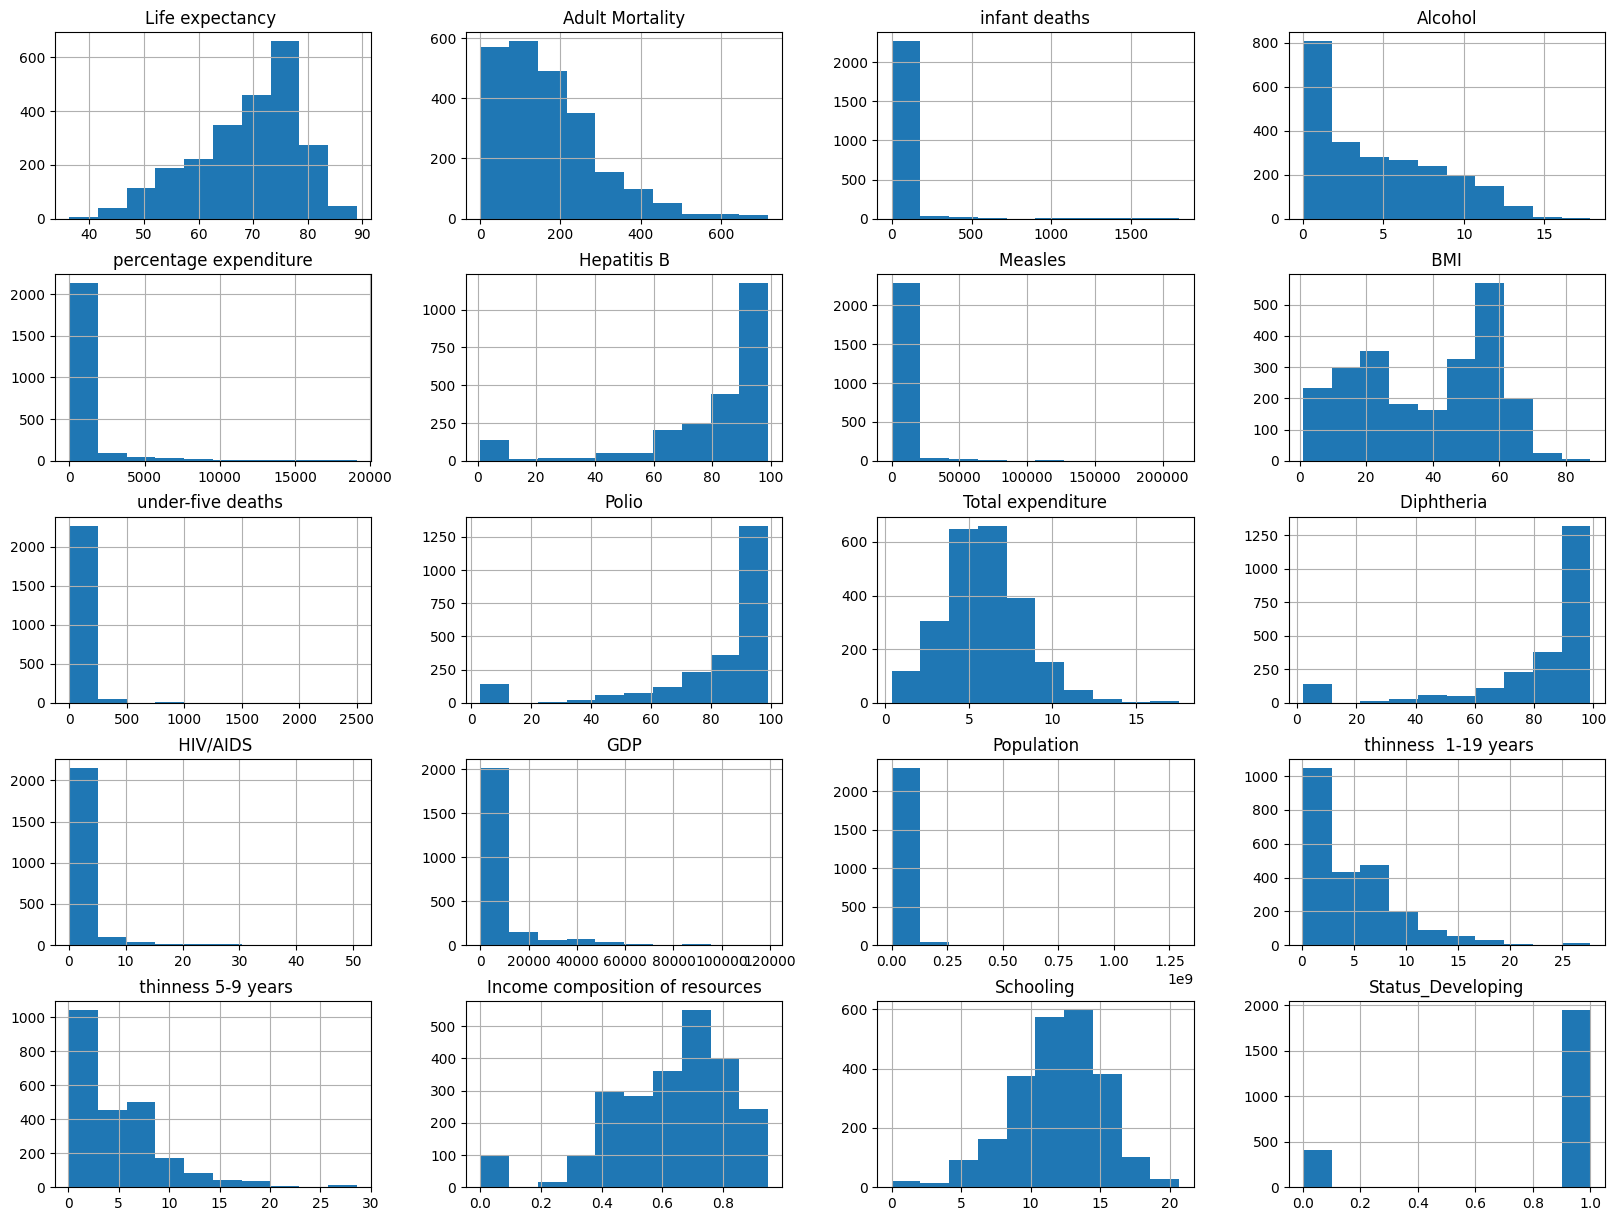

In [183]:
imputed_data.hist(figsize=(20,15));

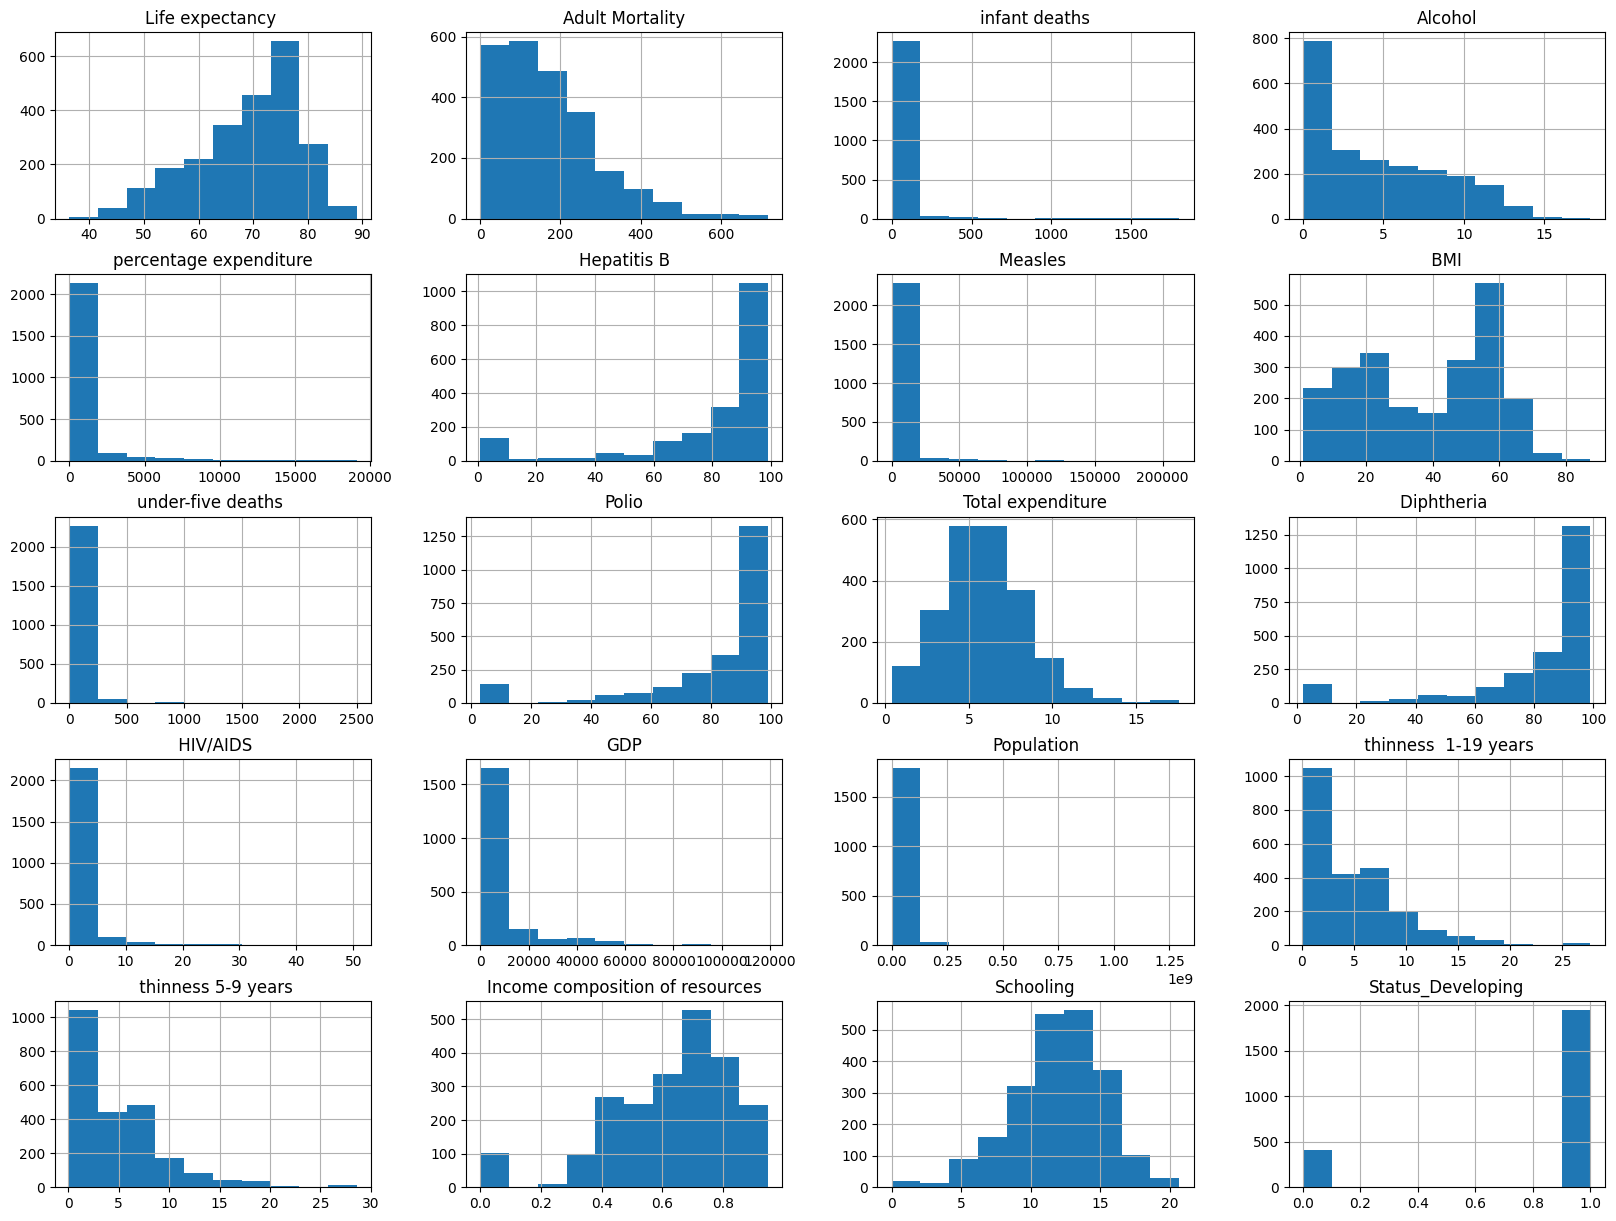

In [184]:
train_set.hist(figsize=(20,15));

In [185]:
isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(imputed_data)
outlier_pred


array([ 1,  1,  1, ...,  1, -1,  1])

In [186]:
print("Number of outliers:", len(imputed_data[outlier_pred == -1]))
print("Number of rows without outliers:", len(imputed_data[outlier_pred == 1]))
imputed_data = imputed_data.iloc[outlier_pred == 1]

print("New shape:", imputed_data.shape)
imputed_data.shape  


Number of outliers: 157
Number of rows without outliers: 2194
New shape: (2194, 20)


(2194, 20)

In [187]:
cat_col=imputed_data['Status_Developing']
cat_col

0       0.0
1       1.0
2       0.0
3       1.0
4       0.0
       ... 
2345    1.0
2346    1.0
2347    1.0
2348    0.0
2350    1.0
Name: Status_Developing, Length: 2194, dtype: float64

In [188]:
num_col=imputed_data.drop('Status_Developing',axis=1)

In [189]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(num_col)
scaled_data=pd.DataFrame(scaled_data,columns=num_col.columns)

cat_col_reset = cat_col.reset_index(drop=True)
scaled_data['Status_Developing'] = cat_col_reset


In [190]:
train_set = train_set.dropna(subset=['Life expectancy '])


life_expectancy = train_set['Life expectancy ']  
train_set_features = train_set.drop('Life expectancy ', axis=1)

In [191]:

# Let's first define our preprocessing steps for the categorical features.
# We're using OneHotEncoder here to convert categorical variables into a form that could be provided to ML algorithms.
categorical_features = train_set_features.select_dtypes(include='object').columns
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', dtype='int'))
])

# Next, for the numerical features, we'll impute any missing values using KNNImputer and then scale them.
numerical_features = train_set_features.select_dtypes(exclude='object').columns
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=15, metric='nan_euclidean'))

])

# Now let's combine these preprocessing steps into one ColumnTransformer. This allows us to apply different transformations to different columns.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# I'll now create the full pipeline, integrating the preprocessor with a RandomForestRegressor as our regression model.
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42, max_depth=5))
])

# We'll now fit the pipeline on our training set. This will apply all the preprocessing steps followed by training our regressor.
pipeline.fit(train_set_features, life_expectancy) 


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=15))]),
                                                  Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Status_Developing'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 dtype='int'))]),
                                                  Index([], dtype='object'))])),
                ('regressor',
                 DecisionTreeRegressor(max_depth=5, random_state=42))])

In [192]:

tree_rmses = -cross_val_score(pipeline, train_set_features, life_expectancy,
                              scoring="neg_root_mean_squared_error", cv=10)
pd.Series(tree_rmses).describe()


count    10.000000
mean      3.033223
std       0.244383
min       2.644948
25%       2.832833
50%       3.069364
75%       3.202615
max       3.419965
dtype: float64

In [193]:
pipeline.fit(train_set_features, life_expectancy)
predictions = pipeline.predict(train_set_features)
tree_rmse = mean_squared_error(life_expectancy, predictions,
                                 squared=False)
tree_rmse

2.7504677291280357

In [195]:
decision_tree_pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("decision_tree", DecisionTreeRegressor(random_state=42)),
])

# Define the parameter grid for the decision tree
param_grid = [
    {'decision_tree__max_depth': [3, 5, 7],
     'decision_tree__min_samples_split': [2, 10, 20],
     'decision_tree__min_samples_leaf': [10,30,40]}
]

# Create the grid search object
grid_search = GridSearchCV(decision_tree_pipeline, param_grid, cv=10,
                           scoring='neg_root_mean_squared_error')

# Fit the grid search to your data
grid_search.fit(train_set_features, life_expectancy) 

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          KNNImputer(n_neighbors=15))]),
                                                                         Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' t...
      dtype='object')),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder(drop='first',
                                                                                                        dtype='int'))]),
                                                                         Index([], dtype='object'))])),
                                       ('decision_tree',
                                        DecisionTreeRegressor(random_state=42))]),
             param_grid=[{'decision_tree__max_depth': [3, 5, 7],
                          'decision_tree__min_samples_leaf': [10, 30, 40],
                          'decision_tree__min_samples_split': [2, 10, 20]}],
             scoring='neg_root_mean_squared_error')

In [196]:
print (grid_search.best_params_)

print (grid_search.best_score_)

print (grid_search.best_estimator_)

final_model = grid_search.best_estimator_

{'decision_tree__max_depth': 7, 'decision_tree__min_samples_leaf': 10, 'decision_tree__min_samples_split': 2}
-2.713449361229439
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer(n_neighbors=15))]),
                                                  Index(['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Status_Developing'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                  

In [197]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
cv_res.head(10) 



,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decision_tree__max_depth,param_decision_tree__min_samples_leaf,param_decision_tree__min_samples_split,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
20,0.382532,0.016763,0.056863,0.008669,7,10,20,"{'decision_tree__max_depth': 7, 'decision_tree...",-2.667195,-2.663754,...,-2.503856,-2.492486,-2.560564,-2.859659,-2.773835,-2.948839,-2.940459,-2.713449,0.159000,1
19,0.384782,0.016829,0.057010,0.006592,7,10,10,"{'decision_tree__max_depth': 7, 'decision_tree...",-2.667195,-2.663754,...,-2.503856,-2.492486,-2.560564,-2.859659,-2.773835,-2.948839,-2.940459,-2.713449,0.159000,1
18,0.385697,0.013528,0.056220,0.004248,7,10,2,"{'decision_tree__max_depth': 7, 'decision_tree...",-2.667195,-2.663754,...,-2.503856,-2.492486,-2.560564,-2.859659,-2.773835,-2.948839,-2.940459,-2.713449,0.159000,1
23,0.398448,0.020499,0.074003,0.056184,7,30,20,"{'decision_tree__max_depth': 7, 'decision_tree...",-2.785784,-2.866587,...,-2.520598,-2.746933,-3.031604,-2.949163,-2.910567,-3.024333,-2.932867,-2.841479,0.157484,4
22,0.401651,0.024011,0.059208,0.007724,7,30,10,"{'decision_tree__max_depth': 7, 'decision_tree...",-2.785784,-2.866587,...,-2.520598,-2.746933,-3.031604,-2.949163,-2.910567,-3.024333,-2.932867,-2.841479,0.157484,4
21,0.399547,0.015817,0.057698,0.006590,7,30,2,"{'decision_tree__max_depth': 7, 'decision_tree...",-2.785784,-2.866587,...,-2.520598,-2.746933,-3.031604,-2.949163,-2.910567,-3.024333,-2.932867,-2.841479,0.157484,4
26,0.375691,0.010985,0.053138,0.005870,7,40,20,"{'decision_tree__max_depth': 7, 'decision_tree...",-2.994125,-3.029589,...,-2.563874,-2.871360,-3.066817,-3.096695,-3.284848,-3.181951,-3.015801,-2.973926,0.215171,7
25,0.394286,0.016043,0.058109,0.005369,7,40,10,"{'decision_tree__max_depth': 7, 'decision_tree...",-2.994125,-3.029589,...,-2.563874,-2.871360,-3.066817,-3.096695,-3.284848,-3.181951,-3.015801,-2.973926,0.215171,7
24,0.397195,0.032018,0.057620,0.005869,7,40,2,"{'decision_tree__max_depth': 7, 'decision_tree...",-2.994125,-3.029589,...,-2.563874,-2.871360,-3.066817,-3.096695,-3.284848,-3.181951,-3.015801,-2.973926,0.215171,7
9,0.392330,0.037242,0.062494,0.012378,5,10,2,"{'decision_tree__max_depth': 5, 'decision_tree...",-2.837505,-3.104180,...,-2.789119,-2.883117,-3.129655,-3.175633,-3.296882,-3.202696,-3.132549,-3.017423,0.207127,10


In [198]:
test_set = test_set.dropna(subset=['Life expectancy '])

X_test = test_set.drop("Life expectancy ", axis=1)
y_test = test_set["Life expectancy "]

X_test_transformed = pipeline.named_steps['preprocessor'].transform(X_test)

final_predictions = final_model.predict(X_test_transformed)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)


KeyError: "['Status_Developing'] not in index"

In [ ]:
X_test_transformed

NameError: name 'X_test_transformed' is not defined

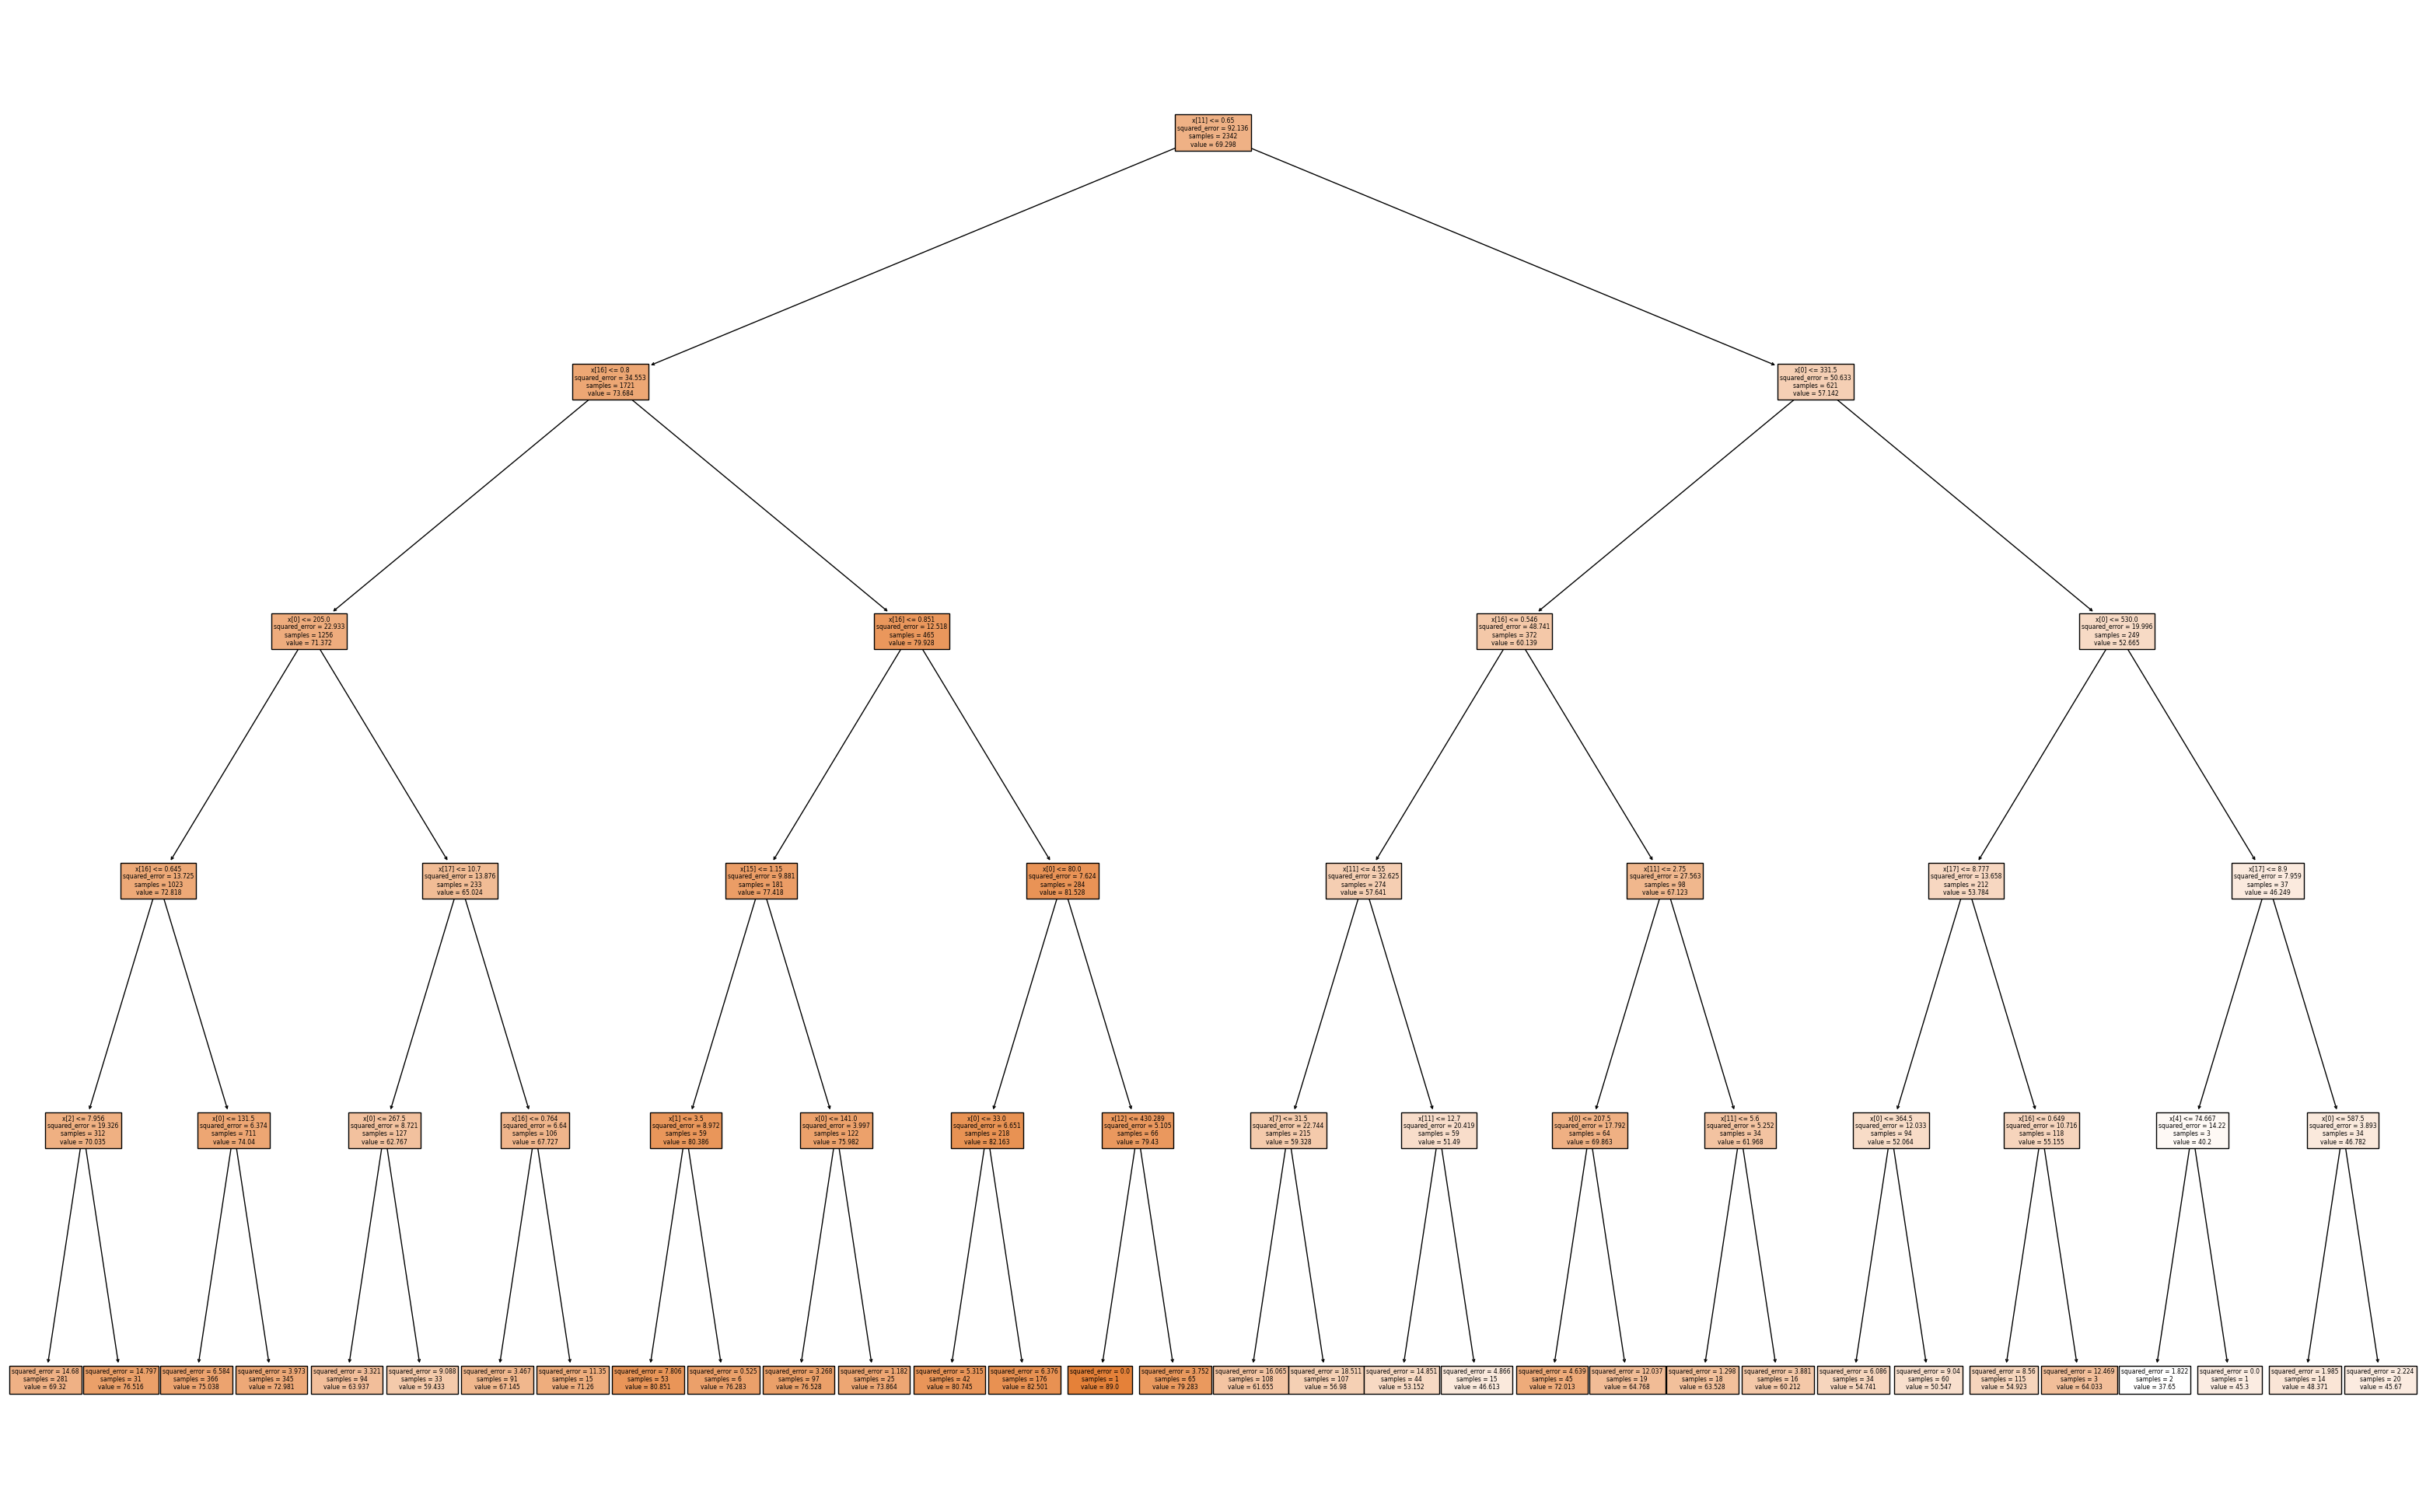

In [ ]:
# Assuming your pipeline is named 'pipeline' and has already been fitted
decision_tree_model = pipeline.named_steps['regressor']
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(40,25))
plot_tree(decision_tree_model, filled=True)
plt.show()


In [ ]:
feature_importances = decision_tree_model.feature_importances_
importance_df = pd.DataFrame({'Feature': train_set_features.columns, 'Importance': feature_importances})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)
print(importance_df)


                            Feature  Importance
11                         HIV/AIDS    0.657725
16  Income composition of resources    0.188371
0                   Adult Mortality    0.125107
17                        Schooling    0.010353
2                           Alcohol    0.007334
7                under-five deaths     0.005956
15               thinness 5-9 years    0.003913
1                     infant deaths    0.000570
12                              GDP    0.000472
4                       Hepatitis B    0.000198
14             thinness  1-19 years    0.000000
13                       Population    0.000000
9                 Total expenditure    0.000000
10                      Diphtheria     0.000000
8                             Polio    0.000000
6                              BMI     0.000000
5                          Measles     0.000000
3            percentage expenditure    0.000000
18                Status_Developing    0.000000


In [ ]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"{indent}if {name} <= {threshold:.2f}:")
            recurse(tree_.children_left[node], depth + 1)
            print(f"{indent}else:  # if {name} > {threshold:.2f}")
            recurse(tree_.children_right[node], depth + 1)
        else:
            print(f"{indent}return {tree_.value[node]}")

    recurse(0, 1)

tree_to_code(decision_tree_model, train_set_features.columns)


  if  HIV/AIDS <= 0.65:
    if Income composition of resources <= 0.80:
      if Adult Mortality <= 205.00:
        if Income composition of resources <= 0.65:
          if Alcohol <= 7.96:
            return [[69.31957295]]
          else:  # if Alcohol > 7.96
            return [[76.51612903]]
        else:  # if Income composition of resources > 0.65
          if Adult Mortality <= 131.50:
            return [[75.03797814]]
          else:  # if Adult Mortality > 131.50
            return [[72.98144928]]
      else:  # if Adult Mortality > 205.00
        if Schooling <= 10.70:
          if Adult Mortality <= 267.50:
            return [[63.93723404]]
          else:  # if Adult Mortality > 267.50
            return [[59.43333333]]
        else:  # if Schooling > 10.70
          if Income composition of resources <= 0.76:
            return [[67.14505495]]
          else:  # if Income composition of resources > 0.76
            return [[71.26]]
    else:  # if Income composition of r